<a href="https://colab.research.google.com/github/roger-telecom/Machine-Learning-and-Data-Science/blob/main/Redes_neurais_com_TensorFlow_(Convers%C3%A3o_Celsius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O QUE SÃO REDES NEURAIS ARTIFICIAIS? COMO ELAS APRENDEM?

De forma básica, redes neurais artificias são implementações baseadas no cérebro humano, para simular as tomadas de decisões, reconhecimentos, entre outros referentes ao cérebro humano. Dessa forma a rede neural artificial cria conexões entre neurônios, no caso temos as entradas atribuidas as variáveis referentes ao ambiente, por onde a informação entra e ganha um determinado peso, nos dendrítos e após isso tem uma função de ativação para que o neurônio seja ativado, no axônio. 

EXEMPLO COM CONVERSÃO CELSIUS PARA FAHRENHEIT

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [13]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [14]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


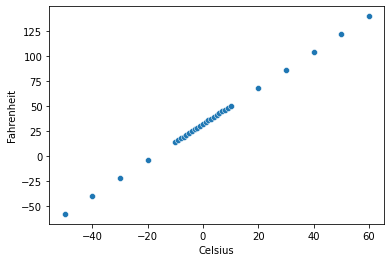

In [15]:
#GRÁFICO FAHRENHEIT X CELSIUS (Regressão Linear)

sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

Base de trenamento

In [22]:
#Configuração

x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [21]:
#Ambas as bases possuem dimensão 30

x_train.shape
y_train.shape

(30,)

In [23]:
#Treinamento

#Denso significa que cada neurônio de uma camada está ligado aos outros neurônios da próxima camada
#Units = 1 porque é uma saída e input_shape = [1] porque é uma entrada

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Adam é o algoritmo utilizado e ele é muito utilizado para descidas de gradientes
#loss é o algoritmo para modelar o erro

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [27]:
#O epochs é quantas vezes irei fazer o treinamento

epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 748ms/step - loss: 1383.0482
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 1295.2893
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1218.0891
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 1151.5487
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1095.6384
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1050.1530
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1014.6695
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 988.5040
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 970.6809
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 959.9291
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 954.7221
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 953.3704
Epoch 13/500
1/1 [=======

Avaliação do modelo

In [28]:
epochs_hist.history.keys()

dict_keys(['loss'])

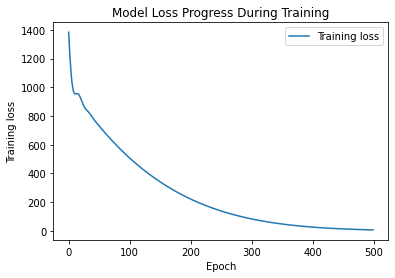

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [31]:
model.get_weights()

[array([[1.8105588]], dtype=float32), array([29.34287], dtype=float32)]

In [32]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[47.448456]], dtype=float32)

In [33]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0